# Algebra lineal
## libreria utiles 
- Numpy
- numpy.linalg
- scipy.linalg
- Simpy (algebra simbolica)
- CVXOPT (problemas de optimización)
- PuLP ( para crear modelos de programación lineal de manera sencilla)
- matplotlib (para realizar graficos)

## Vectores

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import mpl_toolkits.mplot3d


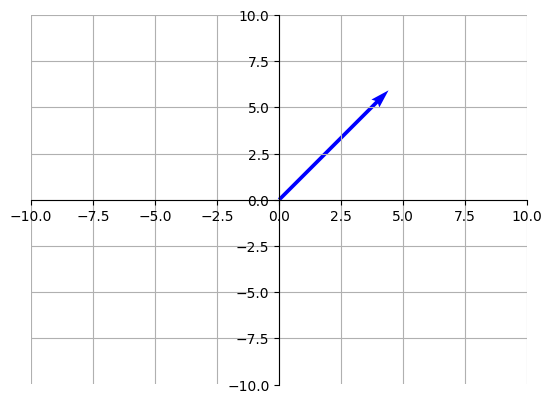

In [2]:
# dibujar vectores
# vector = plt.quiver(0,0,5,5, color='b', units='xy', scale=1)

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

plt.quiver(0,0,5,5, color='b', units='xy', scale=1)

# Move left y-axis and bottim x-axis to centre, passing through (0,0)
ax.spines['left'].set_position('center')
ax.spines['bottom'].set_position('center')

# Eliminate upper and right axes
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')

# Show ticks in the left and lower axes only
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')

plt.xlim(-10, 10)
plt.ylim(-10, 10,)
plt.grid()
  
plt.show()

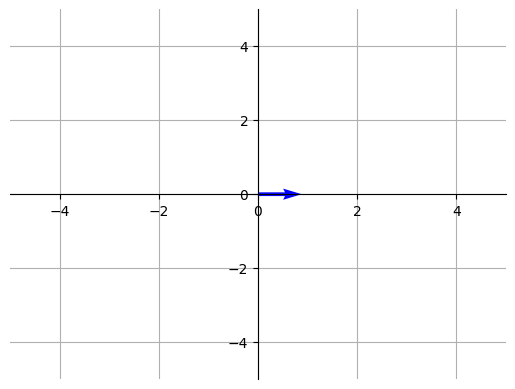

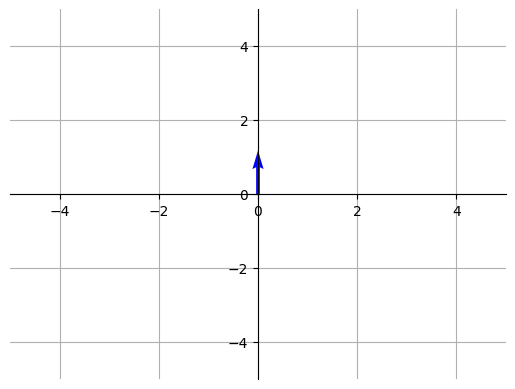

In [4]:
# crear función que dibuje en 3 dimensiones el vector

def plot_vector(vector,dimension):
    if dimension == '3d':
        assert vector.size == 3
        ax = plt.figure().add_subplot(projection='3d')
        ax.quiver(0,0,0, vector[0],vector[1],vector[2],length=0.1, normalize=True)
    
    if dimension == '2d':
        assert vector.size == 2
        ax = plt.figure().add_subplot(1,1,1)
        ax.quiver(0,0, vector[0],vector[1], color='b', units='xy', scale=1)
        
        # Move left y-axis and bottim x-axis to centre, passing through (0,0)
        ax.spines['left'].set_position('center')
        ax.spines['bottom'].set_position('center')

        # Eliminate upper and right axes
        ax.spines['right'].set_color('none')
        ax.spines['top'].set_color('none')

        # Show ticks in the left and lower axes only
        ax.xaxis.set_ticks_position('bottom')
        ax.yaxis.set_ticks_position('left')
        
        plt.xlim(-5, 5)
        plt.ylim(-5, 5)
        plt.grid()
        

    plt.show()

vector3 = np.array([0.2,0.2,0.1])
vector2 = np.array([1,0])
vector = np.array([0,1])
plot_vector(vector2,'2d')
plot_vector(vector,'2d')

## Operaciones con vectores

Vectores: $ x = (x_{1}, ... , x_{n})$

suma:$ x + y =  \left[ {\begin{array}{c} x_{1} + y_{1} \\ x_{2} + y_{2} \\ . \\ . \\ x_{n} + y_{n}  \end{array}} \right]$ ; resta: $x - y  = \left[ {\begin{array}{c} x_{1} - y_{1} \\ x_{2} - y_{2} \\ . \\ . \\ x_{n} - y_{n}  \end{array}} \right]$; Multiplicación: $\tau x = \left[ {\begin{array}{c} \tau x_{1} \\ \tau x_{2} \\ . \\ . \\ \tau x_{n}   \end{array}} \right]$ 

Producto Escalar: $<x,y> = \sum_{i=1}^{n}x_{i}y_{i}$ 

Norma de un vector: $||x|| = \sqrt{<x,x>} = ( \sum_{i=1}^{n}x_{i}^{2} )^{1/2}$


In [11]:
# vector solo python.
vector = [1, 2, 3, 4]

# vector con numpy
import numpy as np
vector1 = np.ones(3) #vector solo de unos
vector2 = np.array([1, 2, 4]) #vector con arrays de python
vector3 = np.arange(1,4) # vector con rango de 1-3 ; resultado = array([1,2,3])

print("vector1:", vector1)
print("vector2:", vector2)
print("vector3:", vector3)

vector1: [1. 1. 1.]
vector2: [1 2 4]
vector3: [1 2 3]


In [10]:
x = np.array([1, 2, 3])
y = np.array([1, 2, 3])
 
# suma
suma = x + y # resultado array([2, 4, 6])
print("suma:", suma)

# resta
resta = x - y # resultado array([0, 0, 0])
print("resta:", resta)

# multiplicación
multiplicacion = x * 2 #resultado array([2, 4, 6])
print("multiplicación:", multiplicacion)

# producto escalar
prod_escalar1 = x @ y # resultado 14
prod_escalar2 = sum(x * y), np.dot(x,y) # resultado (14,14)
print("producto escalar 1:", prod_escalar1)
print("producto escalar 2:", prod_escalar2)

# normal de un vector
normal = np.linalg.norm(x) #resultado 3.7416...
normal2 = np.sqrt(x @ x)
print("normal:", normal)
print("norma2:", normal2)


suma: [2 4 6]
resta: [0 0 0]
multiplicación: [2 4 6]
producto escalar 1: 14
producto escalar 2: (14, 14)
normal: 3.7416573867739413
norma2: 3.7416573867739413


## Matrices 

$A  = \left[ {\begin{array}{cccc} a_{11} & a_{12} & ... & a_{1k} \\  a_{21} & a_{22} & ... & a_{2k} \\ . & . & & . \\ . & . & & . \\ a_{n1} & a_{n2} & ... & a_{nk}  \end{array}} \right]$

suma: $A + B = \left [ \begin{array}{ccc} a_{11} & ... & a_{1k} \\ . & . & . \\ . & . & . \\ a_{n1} & ... & a_{nk}   \end{array} \right] + \left [ \begin{array}{ccc} b_{11} & ... & b_{1k} \\ . & . & . \\ . & .& .& \\  b_{n1} & ... & b_{nk} \end{array} \right ] = \left [ \begin{array}{cccc} a_{11} + b_{11} & ... & a_{1k} + b_{1k} \\ . & . & . & \\ . & . & . \\ a_{n1} + b_{n1} & ... & a_{nk} + b_{nk} \end{array} \right ]$

resta: $A - B = \left [ \begin{array}{ccc} a_{11} & ... & a_{1k} \\ . & . & . \\ . & . & . \\ a_{n1} & ... & a_{nk}   \end{array} \right] + \left [ \begin{array}{ccc} b_{11} & ... & b_{1k} \\ . & . & . \\ . & .& .& \\  b_{n1} & ... & b_{nk} \end{array} \right ] = \left [ \begin{array}{cccc} a_{11} - b_{11} & ... & a_{1k} - b_{1k} \\ . & . & . & \\ . & . & . \\ a_{n1} - b_{n1} & ... & a_{nk} - b_{nk} \end{array} \right ]$
  
Multiplicación: $\tau A =  \left [ \begin{array}{cccc} \tau a_{11} & ... & \tau a_{1k} \\ . & . & . & \\ . & . & . \\ \tau a_{n1} & ... & \tau a_{nk} \end{array} \right ]$

Cuando se multiplica con matrices el numero de columnas de la primera matriz deber ser igual al numero de filas de la segunda matriz; y el resultado de esta multiplicación va a tener el mismo numero de filas que la primera matriz y el numero de la columnas de la segunda matriz. 

$AxB \not= BxA$

In [14]:
A = np.array([[1, 3, 2],
              [1, 0, 0],
              [1, 2, 2]])

B = np.array([[1, 0, 5],
              [7, 5, 0],
              [2, 1, 1]])

# suma
suma = A + B
# # resultado
# array([[2, 3, 7],
#        [8, 5, 0],
#        [3, 3, 3]])
print("suma:", suma)

# Resta
resta = A - B
# resultado
# array([[ 0,  3, -3],
#        [-6, -5,  0],
#        [-1,  1,  1]])
print("resta:", resta)

# multiplicación escalar
mul_escalar = A * 2
# resultado
# array([[2, 6, 4],
#        [2, 0, 0],
#        [2, 4, 4]])
print("multiplicación:", mul_escalar)

# Ver dimension de una matriz
dim = A.shape
# resultado (3,3)
print("dimensión:", dim)

# var cantida de elementos de una matriz
elementos = A.size 
# resultado 9
print("elementos de la matriz:", elementos)

# multiplicación de matrices
A = np.arange(1, 13).reshape(3, 4) # de dimensión 3x4
#Resultado
# array([[ 1,  2,  3,  4],
#        [ 5,  6,  7,  8],
#        [ 9, 10, 11, 12]])
print("A", A)

B = np.arange(8).reshape(4,2) #matriz de dimension 4x2
#resultado 
# array([[0, 1],
#        [2, 3],
#        [4, 5],
#        [6, 7]])
print("B:", B)

mul_matrices = A @ B 
# resultado
# array([[ 40,  50],
#        [ 88, 114],
#        [136, 178]])
print("multiplicación de matrices:", mul_matrices)



suma: [[2 3 7]
 [8 5 0]
 [3 3 3]]
resta: [[ 0  3 -3]
 [-6 -5  0]
 [-1  1  1]]
multiplicación: [[2 6 4]
 [2 0 0]
 [2 4 4]]
dimensión: (3, 3)
elementos de la matriz: 9
A [[ 1  2  3  4]
 [ 5  6  7  8]
 [ 9 10 11 12]]
B: [[0 1]
 [2 3]
 [4 5]
 [6 7]]
multiplicación de matrices:
 [[ 40  50]
 [ 88 114]
 [136 178]]


### Matriz identidad
Es el equivalente al numero 1  o elemento neutro. Es una matriz cuadrada es decir mismo numero de columnas y filas. Se representa con $I$ y su diagonal esta compuesta de unos.

### Matriz inversa
Es aquella matriz cuadrada $A^{-1} $ que cuando realizas la multiplicación $AxA^{-1}$ sea igual a la matriz identidad, $AxA^{-1} = A^{-1}xA = I$ . En el caso de que una matriz no contenga matriz inversa, dicha matriz sera una matriz singular. Una matriz es singular si y solos si su determinante es nulo.

### Matriz transpuesta
Es una matriz en que las filas se vuelven columna y las columnas filas. $A^{T}$


In [19]:
A = np.array([[4, 7],
              [2, 6]])

# matriz identidad de 2x2
I = np.eye(2)
# resultado
# array([[1., 0.],
#        [0., 1.]])
print("matriz identidad:", I)

# determinante de una matriz
D = np.linalg.det(A) # resultado D = 10
print("determinante:", D)

# matriz inversa
A_inv = np.linalg.inv(A)
#resultado
# array([[ 0.6, -0.7],
#        [-0.2,  0.4]])
print("matriz inversa:", A_inv)

#trasponer una matriz
transpuesta = np.transpose(A) 
# respuesta 
# array([[4, 2],
#        [7, 6]])
print("matriz transpuesta:", transpuesta)


matriz identidad: [[1. 0.]
 [0. 1.]]
determinante: 10.000000000000002
matriz inversa: [[ 0.6 -0.7]
 [-0.2  0.4]]
matriz transpuesta: [[4 2]
 [7 6]]


## Sistemas de ecuaciones lineales
para resolver sistemas lineales podemos usar el metodo solve().

$\begin{array}{rcl}
     x+ 2y + 3z & = & 6
  \\ 2x + 5y + 2z & = & 4
  \\ 6x - 3y + z & = & 2
\end{array}
$

In [1]:
# matriz de coeficientes
A = np.array([[1, 2, 3],
              [2, 5, 2],
              [6, -3, 1]])

# matriz de resultados
b = np.array([6, 4, 2])

# resolviendo el sistema
x = np.linalg.solve(A, b)
#resultado array([0., 0., 2.])
print("resultado:", x)

# chequiando la solución 
resultado = A @ x == b
print("confirmar resultados:", resultado)
# resultado array([ True,  True,  True])

NameError: name 'np' is not defined

# Space transformations

In [2]:
import torch
import torch.nn as nn
from matplotlib import pyplot as plt
import numpy as np

In [29]:
# create plot styles and tools from alfredo notebook
plt.style.use(['dark_background', 'bmh'])
plt.rc('axes', facecolor='k')
plt.rc('figure', facecolor='k')
plt.rc('figure', figsize=(10,10), dpi=50)

def plot_bases(bases, width=0.04):
    bases = bases.cpu()
    bases[2:] -= bases[:2]
    plt.arrow(*bases[0], *bases[2], width=width, color=(1,0,0), zorder=10, alpha=1., length_includes_head=True)
    plt.arrow(*bases[1], *bases[3], width=width, color=(0,1,0), zorder=10, alpha=1., length_includes_head=True)

def show_scatterplot(X, colors, title=''):
    colors = colors.cpu().numpy()
    X = X.cpu().numpy()
    plt.figure()
    plt.axis('equal')
    plt.scatter(X[:, 0], X[:, 1], c=colors, s=30)
    plt.grid(True)
    plt.title(title)
    plt.axis('off')

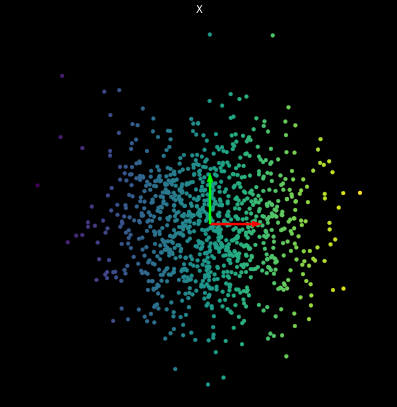

In [30]:
# generate data in 2D 
n_points = 1000 #number of points
X = torch.randn(n_points, 2) #data points
colors = X[:, 0]
OI = torch.cat((torch.zeros(2, 2), torch.eye(2)))

show_scatterplot(X, colors, title='X')
plot_bases(OI)

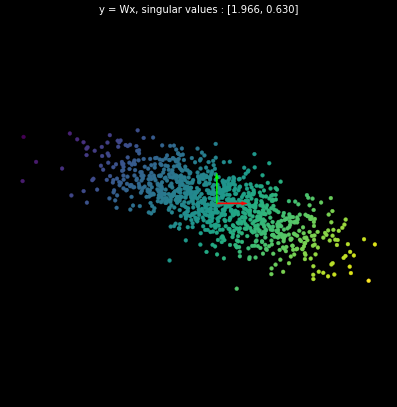

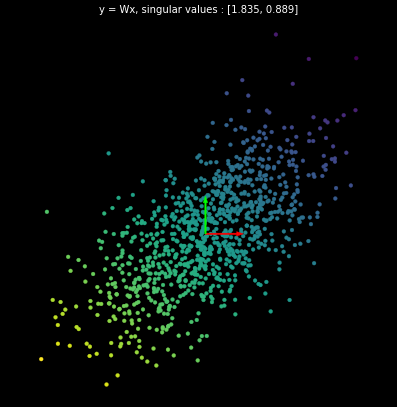

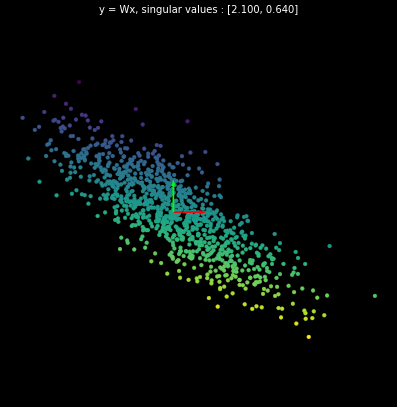

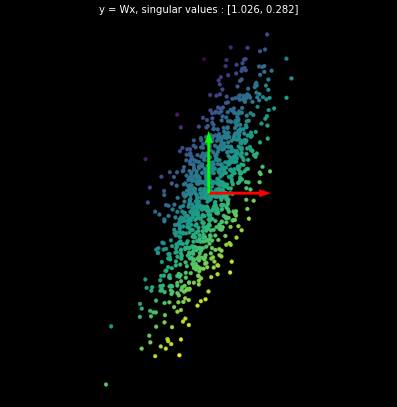

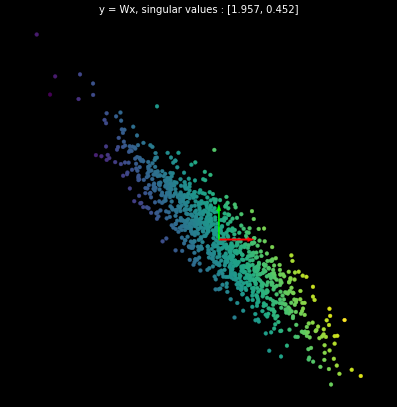

In [33]:
# Generate a random matrix W = U[[s1, 0][0, s2]]V.T
# Compute y = Wx
# larager singular  values stretch the points and smarllers push them together
# U: rotate the points, V reflect the points

for i in range(5):
    # create a random matrix
    W = torch.randn(2, 2) 
    # transform points
    Y = X @ W.t()
    # compute singular values
    U, S, V = torch.svd(W)
    # plot transformed points
    show_scatterplot(Y, colors, title='y = Wx, singular values : [{:.3f}, {:.3f}]'.format(S[0], S[1]))
    # transform the basis
    new_OI = OI @ W.t()
    # plot old and new basis
    plot_bases(OI)
#     plot_bases(new_OI)

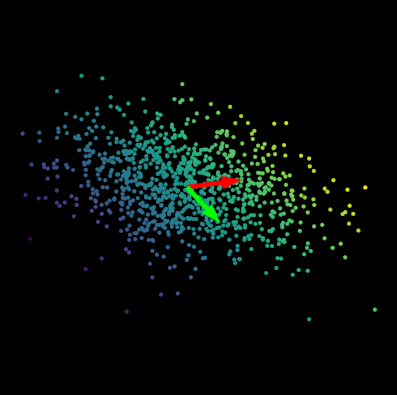

In [38]:
# Linear transformation with pytorch

model = nn.Sequential(nn.Linear(2, 2, bias=False))

with torch.no_grad():
    Y = model(X)
    show_scatterplot(Y, colors)
    plot_bases(model(OI))

Text(0.5, 1.0, 'tanh() non linearity')

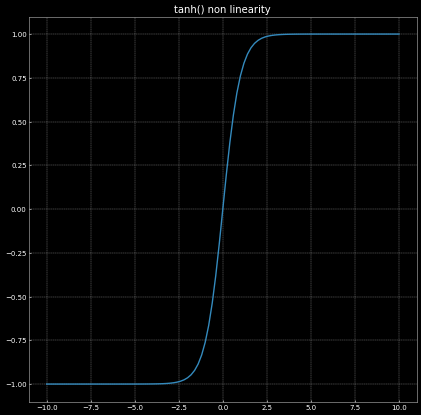

In [39]:
# non-linear trasnformation can curve the space

z = torch.linspace(-10, 10, 101)
s = torch.tanh(z)
plt.plot(z.numpy(), s.numpy())
plt.title('tanh() non linearity')

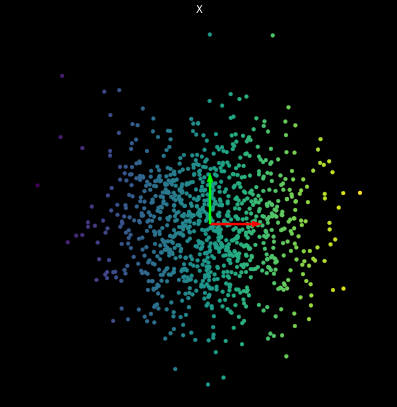

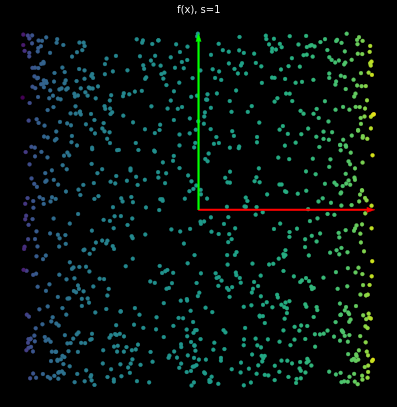

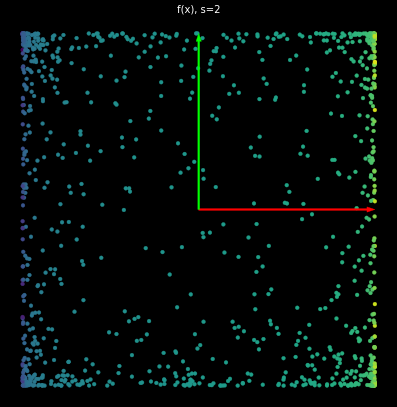

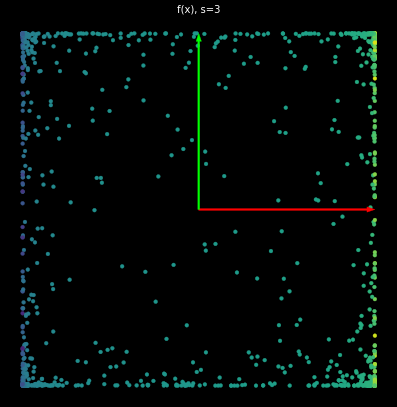

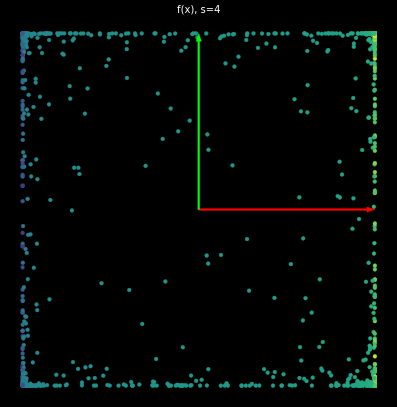

In [41]:
show_scatterplot(X, colors, title='X')
plot_bases(OI)

model = nn.Sequential(
        nn.Linear(2, 2, bias=False), #linear function
        nn.Tanh() #non-linear function
)

for s in range(1, 5):
    W = s * torch.eye(2)
    model[0].weight.data.copy_(W)
    Y = model(X).data
    show_scatterplot(Y, colors, title=f'f(x), s={s}')
    plot_bases(OI, width=0.01)

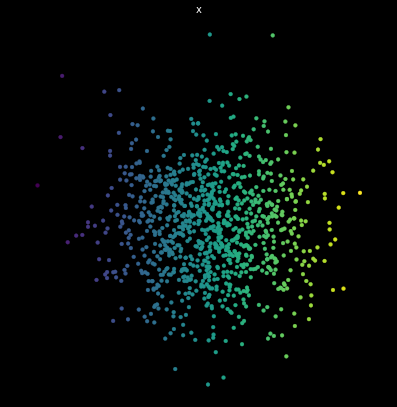

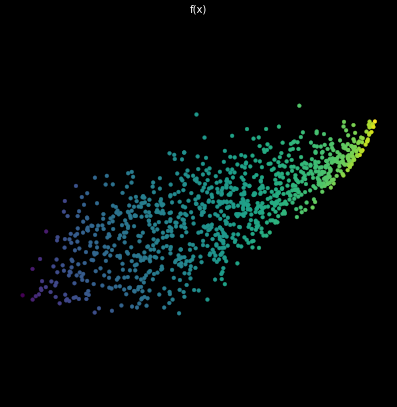

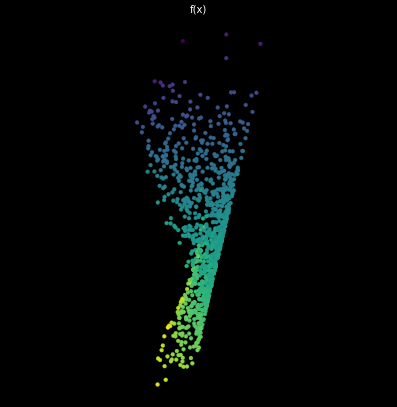

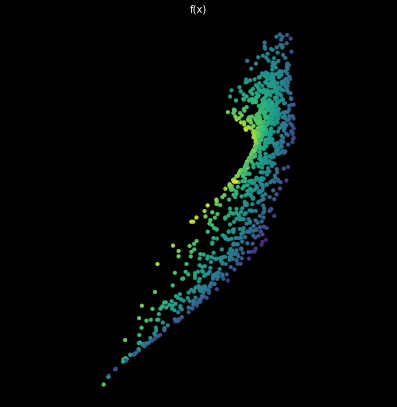

In [44]:
# 1 layer NN with random weights it means not trained

show_scatterplot(X, colors, title='x')
n_hidden = 5

for i in range(3):
    model = nn.Sequential(
            nn.Linear(2, n_hidden), 
            nn.Tanh(), #can be nn.ReLU()
            nn.Linear(n_hidden, 2)
        )

    with torch.no_grad():
        Y = model(X)
    show_scatterplot(Y, colors, title='f(x)')
#     plot_bases(OI)

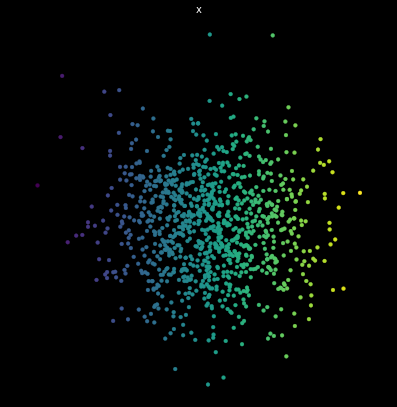

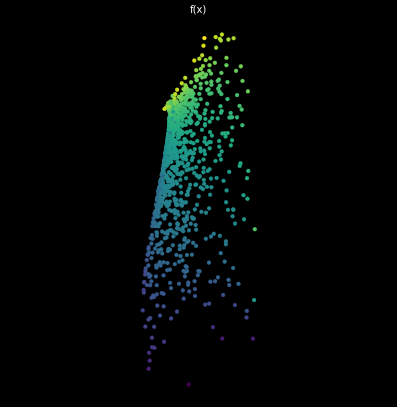

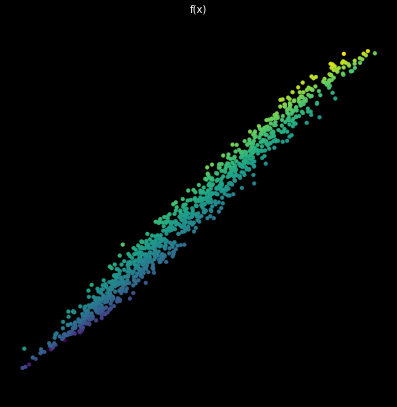

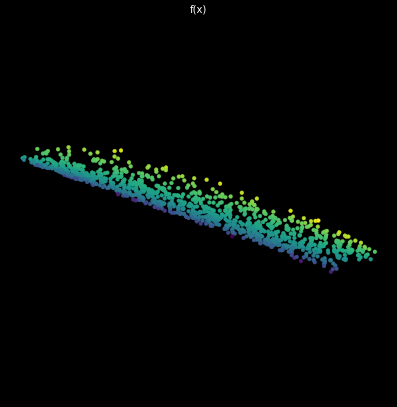

In [50]:
#  deeeper neural network
show_scatterplot(X, colors, title='x')
n_hidden = 5

NL = nn.ReLU()
# activation = nn.Tanh()

for i in range(3):
    model = nn.Sequential(
        nn.Linear(2, n_hidden), 
        activation, 
        nn.Linear(n_hidden, n_hidden), 
        activation, 
        nn.Linear(n_hidden, n_hidden), 
        activation, 
        nn.Linear(n_hidden, n_hidden), 
        activation, 
        nn.Linear(n_hidden, 2)
    )

    with torch.no_grad():
        Y = model(X).detach()
    show_scatterplot(Y, colors, title='f(x)')